In [1]:
import cv2
import pickle
import matplotlib.pyplot as plt
import os

In [67]:
def draw_legend(image):
    font = cv2.FONT_HERSHEY_SIMPLEX 
  
    # fontScale 
    fontScale = 0.5

    # Line thickness of 2 px 
    thickness = 1

    # Using cv2.putText() method 
    cv2.putText(image, 'crossing', (10, 20), font,  
                       fontScale, (0,0,255), thickness, cv2.LINE_AA) 
    cv2.putText(image, 'Not crossing', (10, 40), font,  
                       fontScale, (255, 0, 0), thickness, cv2.LINE_AA) 


In [2]:
def get_ground_truth(path):
    with open(path, 'r') as f:
          data = f.readlines()
    return data

In [64]:
def draw_predicted(predicted, image):
    for i, cordinate in enumerate(predicted):
        cordinate = cordinate.split(' ')
        x1 = int(cordinate[3])
        y1 = int(cordinate[4])
        x2 = int(cordinate[5])
        y2 = int(cordinate[6])
        color = (0,0,255) if int(cordinate[0]) == 2 else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 1)

In [4]:
def draw_ground_true(ground_truth, image):
    for i, cordinate in enumerate(ground_truth):
        cordinate = cordinate.split(' ')
        x1 = int(cordinate[1])
        y1 = int(cordinate[2])
        x2 = int(cordinate[3])
        y2 = int(cordinate[4])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 1)

In [74]:
import imageio

In [76]:
#define parameters

video_name = 'video_0077'
ground_truth_path = f'annotations_yowo/{video_name}'
predicted_path = 'detections_4/detections_4'
total_frame = len(os.listdir(ground_truth_path))
threshold = 0.25
demo_path = 'demo'
if not os.path.exists(demo_path):
        os.makedirs(demo_path)
        
#draw boxes and generate video        
out = cv2.VideoWriter(os.path.join(demo_path, f'{video_name}.mp4'), cv2.VideoWriter_fourcc('M','P','4','V'), 30, (480,270))
images = []
for i in range(0, total_frame):
    image = cv2.imread(f'images/{video_name}/{i:05d}.png')
    with open(os.path.join(ground_truth_path, f'frame{i:05d}.txt'), 'r') as f:
          ground_truth = f.readlines()
    draw_ground_true(ground_truth, image)
    with open(os.path.join(predicted_path, f'{video_name}_{i:05d}.txt'), 'r') as f:
          predicted = f.readlines()
    predicted = [p for p in predicted if float(p.split(' ')[1]) > threshold]
    draw_predicted(predicted, image)
    draw_legend(image)
    images.append(image)
    out.write(image)
out.release()
imageio.mimsave(f'{video_name}_gif.gif', images)

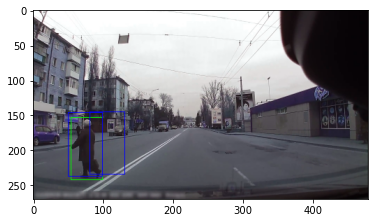

In [8]:
plt.imshow(image)

In [7]:
import os
vidcap = cv2.VideoCapture('demo/times3.mp4')
success, image = vidcap.read()
frame_num = 0
img_count = 0
if not success:
    print('Failed to open the video {}'.format(vid))
while success:
    img_count += 1
    out_path = os.path.join('demo/times2', f"{frame_num:05d}.png")
    if not os.path.exists(out_path):
#         image = cv2.resize(image, (384, 216), interpolation = cv2.INTER_AREA)
        cv2.imwrite(out_path, image)
    else:
        print('path %s already exists')
    success, image = vidcap.read()
    frame_num += 1

In [17]:
import cv2
import os
def convert_image_to_video():
    os.getcwd()
    image_path = 'demo/times2'
    video_resized_path = 'demo/videodemo_0002'
    if not os.path.exists(video_resized_path):
        os.makedirs(video_resized_path)
#     out = cv2.VideoWriter(f'{video_resized_path}.mp4', cv2.VideoWriter_fourcc('M','P','4','V'), 30, (480,256))
    image_names = os.listdir(image_path)
    for image_name in image_names:
        img = cv2.imread(os.path.join(image_path, image_name))
        img = cv2.resize(img[:307, :], (480, 256), interpolation = cv2.INTER_AREA)
        cv2.imwrite(f'{video_resized_path}/{image_name}', img)
#         out.write(img)
convert_image_to_video()

In [30]:
os.getcwd()

'C:\\Users\\lamnt59\\bigdata_subject\\project\\CV\\JAAD'

In [58]:
for i in range(len(os.listdir('demo/videodemo_0005'))):
    with open(f'demo/annotation_yowo/videodemo_0005/{i:05d}.txt', 'w') as f:
        f.write('1 2 3 4 5')

In [59]:
with open(f'demo/annotation_yowo/testlist_0005.txt', 'w') as f:
    for i in range(len(os.listdir('demo/videodemo_0005'))):
        f.write(f'videodemo_0001/{i:05d}.txt\n')

In [36]:
#define parameters
video_name = 'videodemo_0001'
# ground_truth_path = f'annotations_yowo/{video_name}'
predicted_path = 'demo/jaad_detections_demo/detections1'
total_frame = len(os.listdir(predicted_path))
threshold = 0.25
demo_path = 'demo'
if not os.path.exists(demo_path):
        os.makedirs(demo_path)
        
#draw boxes and generate video        
out = cv2.VideoWriter(os.path.join(demo_path, f'{video_name}_box.mp4'), cv2.VideoWriter_fourcc('M','P','4','V'), 30, (480,256))
for i in range(0, total_frame):
    image = cv2.imread(f'demo/{video_name}/{i:05d}.png')
#     with open(os.path.join(ground_truth_path, f'frame{i:05d}.txt'), 'r') as f:
#           ground_truth = f.readlines()
#     draw_ground_true(ground_truth, image)
    with open(os.path.join(predicted_path, f'videodemo_0001_{i:05d}.txt'), 'r') as f:
          predicted = f.readlines()
    predicted = [p for p in predicted if float(p.split(' ')[1]) > threshold]
    draw_predicted(predicted, image)
    out.write(image)
out.release()

In [45]:
import os
os.getcwd()

'C:\\Users\\lamnt59\\bigdata_subject\\project\\CV\\JAAD'

In [46]:
videos = os.listdir('detections_4/detections_4/')

In [51]:
videos = [v[:10] for v in videos]

In [55]:
video_sets = {videos[0]}
for v in videos:
    video_sets.add(v)

In [57]:
def draw(video_name):
    ground_truth_path = f'annotations_yowo/{video_name}'
    predicted_path = 'detections_4/detections_4'
    total_frame = len(os.listdir(ground_truth_path))
    threshold = 0.25
    demo_path = 'demo'
    if not os.path.exists(demo_path):
            os.makedirs(demo_path)

    #draw boxes and generate video        
    out = cv2.VideoWriter(os.path.join(demo_path, f'{video_name}.mp4'), cv2.VideoWriter_fourcc('M','P','4','V'), 30, (480,270))
    for i in range(0, total_frame):
        image = cv2.imread(f'images/{video_name}/{i:05d}.png')
        with open(os.path.join(ground_truth_path, f'frame{i:05d}.txt'), 'r') as f:
              ground_truth = f.readlines()
        draw_ground_true(ground_truth, image)
        with open(os.path.join(predicted_path, f'{video_name}_{i:05d}.txt'), 'r') as f:
              predicted = f.readlines()
        predicted = [p for p in predicted if float(p.split(' ')[1]) > threshold]
        draw_predicted(predicted, image)
        out.write(image)
    out.release()

In [58]:
for v in video_sets:
    draw(v)